# One variable continuous data in `matplotlib` and `seaborn` <img src="images/JHI_STRAP_Web.png" style="width: 150px; float: right;">

<div class="alert alert-success">
<h2>Introduction</h2>
</div>

This notebook exercise will describe visualisation of one-dimensional continuous data in `Python`, using the `matplotlib` and `seaborn` libraries.

For these examples, we will work with randomly-sampled data from statistical distributions.

#### Python imports

To set up `pylab`, we run a cell containing the line:

```python
%pylab inline
```

This will make `matplotlib` and `NumPy` libraries available to us in the notebook.

In [1]:
# Run the pylab magic in this cell
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`Seaborn` can be imported with the following code:

```python
import seaborn as sns
```

In [2]:
# Import seaborn
import seaborn as sns

<div class="alert alert-warning">
<b>NOTE:</b> Even if you do not explicitly plot using <b>seaborn</b> as <b>sns</b>, the <b>matplotlib</b> plot style changes in the notebook.
</div>


![1D continous data subplots](images/intro_image.png)

### Learning Outcomes

* Representing one-dimensional continuous-valued data using `matplotlib` and `seaborn` libraries
* Generating random example data
* Use of `figure()` and subplots

<div class="alert alert-success">
<h2>Exercise</h2>
</div>

<div class="alert alert-success">
<h3>1. Creating a random dataset</h3>
</div>

#### Creating a random dataset

The `Numpy` library contains a module called `random` which provides a number of utility functions for generating (pseudo-)random value data. Once `pylab` is running, you can find out more about this module with `help(random)`.

We will use the `random.random()` function to generate 100 datapoints in the variable `data`, whose distribution we will explore graphically using `matplotlib`

```python
data = random.random(100)
```

Other random samplings are available, such as:

* `random.randint(10, size=10)`: integers in a range
* `random.randn(10)`: standard normal distribution
* `random.negative_binomial(1, 0.1, 10)`: negative binomial distribution

and so on. Feel free to try them below

In [3]:
# Create the variable data, containing 100 random values, here
data = random.random(100)

<div class="alert alert-success">
<h3>2. Histogram</h3>
</div>

#### Base histogram

[Histograms](http://www.datavizcatalogue.com/methods/histogram.html) represent the distribution of data over a continuous interval. The total area of the histogram is considered equal to the number of datapoints, and the area of each bar represents the frequency of datapoints in each interval, or *bin*.

We can draw a basic histogram of our data with the code below, using the `hist()` function:

```python
n, bins, patches = hist(data)
```

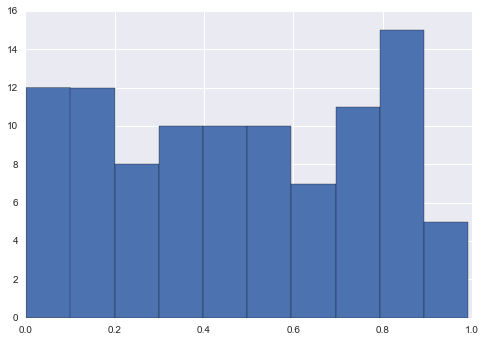

In [4]:
# Draw basic histogram in this cell
n, bins, patches = hist(data)

You will probably find this basic histogram to be pretty uninspiring. The colour choice is flat, and the whole appearance is quite blocky and uninformative. It lacks a title or any other detail.

The objects returned by the `hist()` function are:

* `n`: an array of values for each bar in the histogram, reflecting its height on the *y*-axis
* `bins`: an array of the minimum values for each bin (breakpoints)
* `patches`: objects representing the graphical elements for each bar

You can explore the contents of these variables in the cell below

In [5]:
# Explore the contents of n, bins, and patches in this cell
bins

array([ 0.00145498,  0.10050314,  0.1995513 ,  0.29859945,  0.39764761,
        0.49669577,  0.59574393,  0.69479208,  0.79384024,  0.8928884 ,
        0.99193656])

#### Normalised histograms

The base histogram above reports absolute counts of the data in each bin. A normalised histogram reports *frequencies*, essentially modifying bin heights so that the integral of the histogram (total area) is equal to unity (1). This makes the histogram a, perhaps blocky, probability density curve.

To generate a normalised histogram, we just need to set `normed=1` in the call to `hist()`:

```python
n, bins, patches = hist(data, normed=1)
```

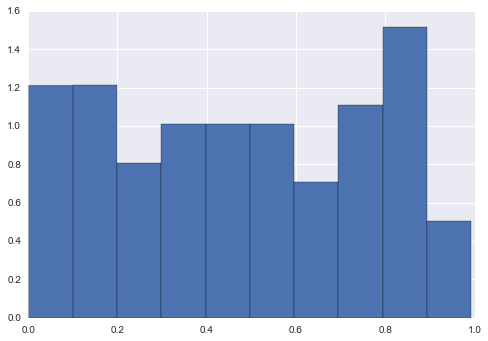

In [6]:
# Create a normalised histogram in this cell
n, bins, patches = hist(data, normed=1)

You will notice that the values on the *y*-axis have changed. 

<div class="alert alert-warning">
If you are using, for instance, a uniform random distribution, you will also notice that, perhaps counter-intuitively, some of the bars may extend past the value 1.0 on the <i>y</i>-axis; this is because the area of each bar is the width of the bin multiplied by its height, and the bin widths in this example are all around 0.1.
</div>

#### Modifying histogram appearance, and `subplots`

We can modify several aspects of the histogram's appearance (see, e.g. `help(hist)` for documentation) in the call to `hist()`:

* `bins`: the number of bins into which the data will be divided
* `facecolor`: the colour of each rectangle in the histogram
* `alpha`: the transparency value for the histogram (useful when layering plots)

We'll try this with the code below:

```python
n, bins, patches = hist(data, normed=1, bins=20, facecolor='green', alpha=0.6)
```

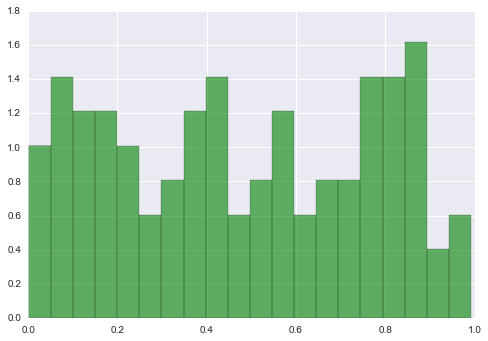

In [7]:
# Modify the histogram appearance in this cell
n, bins, patches = hist(data, normed=1, bins=20, facecolor='green', alpha=0.6)

#### Stepfilling

So far, our histograms have surrounded each of the bars with a border line. There is a different representation: `histtype=stepfilled`, which makes the plot look more like a density plot:

```python
n, bins, patches = hist(data, normed=1, bins=20, facecolor='green',
                        alpha=0.6, histtype='stepfilled')
```

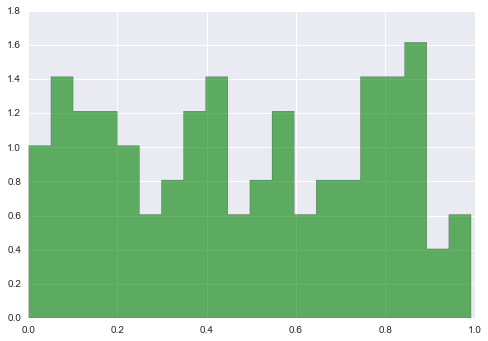

In [8]:
# Create a stepfilled histogram
n, bins, patches = hist(data, normed=1, bins=20, facecolor='green',
                        alpha=0.6, histtype='stepfilled')

<div class="alert alert-success">
<h3>3. Subplots and labels</h3>
</div>

We can place histograms, or any other plot, into *subplots*. These render several sets of axes on the same figure, to enable several visualisations to be placed alongside each other.

The general approach is as follows:

1. Create a `Figure()` object
2. Add as many subplots (`Axes()`) to the `Figure()` as you require, specifying their location in a grid structure.
3. Add your visualisations to the subplot (`Axes()`) objects

In the example below, we will create a 1x3 grid, and revisualise the three histograms from the examples above, with the code below:

```python
# Create figure
fig = figure()

# Create subplot axes
ax1 = fig.add_subplot(1, 3, 1)  # 1x3 grid, position 1
ax2 = fig.add_subplot(1, 3, 2)  # 1x3 grid, position 1
ax3 = fig.add_subplot(1, 3, 3)  # 1x3 grid, position 1

# Add histograms
ax1.hist(data)
ax2.hist(data, normed=1)
ax3.hist(data, normed=1, bins=20, facecolor='green', alpha=0.6)
```

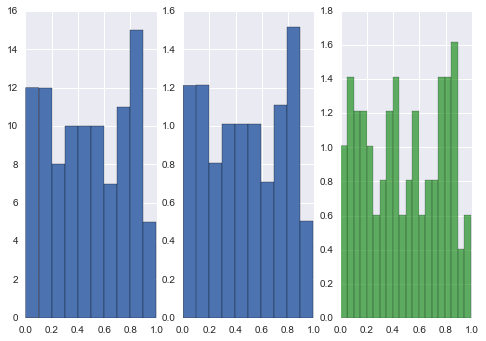

In [9]:
# Create 1x3 subplot of histograms in this cell
# Create figure
fig = figure()

# Create subplot axes
ax1 = fig.add_subplot(1, 3, 1)  # 1x3 grid, position 1
ax2 = fig.add_subplot(1, 3, 2)  # 1x3 grid, position 1
ax3 = fig.add_subplot(1, 3, 3)  # 1x3 grid, position 1

# Add histograms
ax1.hist(data)
ax2.hist(data, normed=1)
ax3.hist(data, normed=1, bins=20, facecolor='green', alpha=0.6);

The first run of this code is likely to be disappointing, as the aspect ratio will likely make the output image appear cramped and untidy. This is because the default figure size has not been changed.

The overall output size of the figure can be set with `figsize=(width, height)`, where `width` and `height` are the output image value in inches. We can set a more favourable aspect ratio with the following code:

```python
fig = figure(figsize=(8, 3))
```

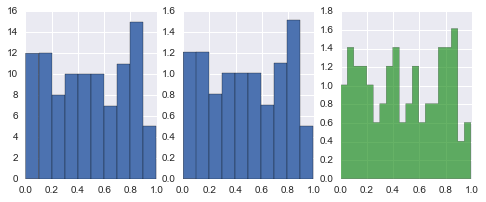

In [10]:
# Replot the subplots in this cell, with a better aspect ratio
# Create figure
fig = figure(figsize=(8, 3))

# Create subplot axes
ax1 = fig.add_subplot(1, 3, 1)  # 1x3 grid, position 1
ax2 = fig.add_subplot(1, 3, 2)  # 1x3 grid, position 1
ax3 = fig.add_subplot(1, 3, 3)  # 1x3 grid, position 1

# Add histograms
ax1.hist(data)
ax2.hist(data, normed=1)
ax3.hist(data, normed=1, bins=20, facecolor='green', alpha=0.6, histtype='stepfilled');

Labels and titles can be added to each individual axis in the figure.

Here, the first histogram has a *y*-axis of absolute count, but the other two plots have a *y*-axis of normalised frequency. All axes have `data` values along the *x*-axis.

We can treat axes like any other variable, and loop over them, as in the code below:

```python
# Set first axis y-label
ax1.set_ylabel('count')

# Set second, third axes y-labels
for axis in (ax2, ax3):
    axis.set_ylabel('frequency')

# Set all axes x-labels
for axis in (ax1, ax2, ax3):
    axis.set_xlabel('data')
    
# Set axis titles
ax1.set_title('basic')
ax2.set_title('normalised')
ax3.set_title('modified')
```

These changes will modify the figure *in memory*, but won't change any already-rendered images. To do this, we'll have to show the contents of `fig` in an output cell again. First though, we will apply the `tight_layout()` method so that the labels do not overlap the graphs:

```python
fig.tight_layout()
fig
```

* `matplotlib` tight layout guide: [http://matplotlib.org/users/tight_layout_guide.html](http://matplotlib.org/users/tight_layout_guide.html)

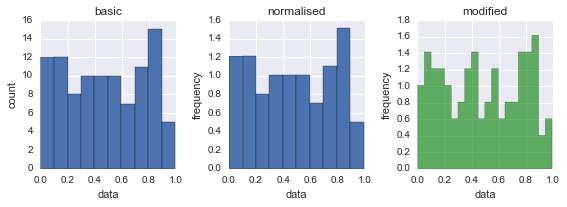

In [11]:
# Add axis labels in this cell, and rerender the image
# Set first axis y-label
ax1.set_ylabel('count')

# Set second, third axes y-labels
for axis in (ax2, ax3):
    axis.set_ylabel('frequency')

# Set all axes x-labels
for axis in (ax1, ax2, ax3):
    axis.set_xlabel('data')  

# Set axis titles
ax1.set_title('basic')
ax2.set_title('normalised')
ax3.set_title('modified')    
    
# Use tight_layout to prettify
fig.tight_layout()
fig

<div class="alert alert-success">
<h3>4. Density Plots</h3>
</div>

Histograms plot counts or frequencies of one-dimensional data. This gives a (necessarily) blocky representation of the raw data. An alternative representation is the *kernel density estimate* (KDE) plot which smooths the data (usually with a Gaussian basis function). 

* Kernel density estimation: [Wikipedia](https://en.wikipedia.org/wiki/Kernel_density_estimation)

There is no KDE/density plot function in `matplotlib`, but the `kdeplot()` function in `seaborn` fits a KDE to a given dataset:

```python
sns.kdeplot(data)
```

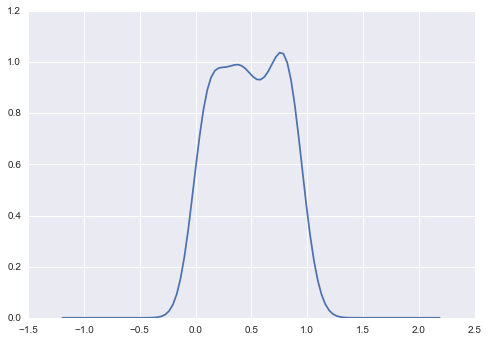

In [12]:
# Draw a seaborn distplot()
sns.kdeplot(data);

We get quite a bit of control over the choice of kernel and bandwidth reference method for determination of kernel size. For more information see `help(sns.kdeplot)` or the documentation.

* `sns.kdeplot()`: [documentation](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.kdeplot.html)

#### Distribution plots with `seaborn`

`seaborn` makes it easy to draw distribution plots combining three representations: histogram, KDE plot and *rug plot*, with the `sns.distplot()` function. By default, only the histogram and KDE plot are shown, but all three types can be controlled by specifying `hist=True`, `kde=True`, `rug=True` (or `False` in each case):

```python
sns.distplot(data, rug=True)
```

*Rug plots* draw small vertical ticks at each observation point, giving an alternative representation of data density.

<div class="alert alert-warning">
<b>NOTE:</b> if only the histogram is drawn, the <i>y</i>-axis reverts to count data. Including the KDE sets the <i>y</i> axis to frequency, and essentially normalises the histogram.
</div>


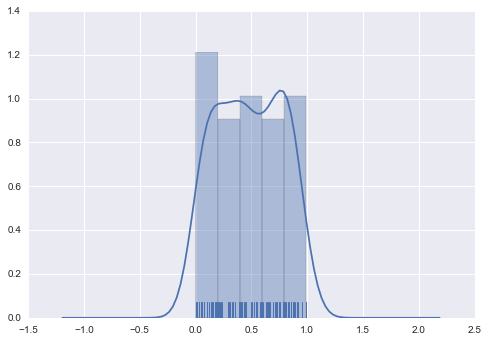

In [13]:
# Use sns.distplot() to render the data with a rug plot
sns.distplot(data, rug=True);

#### Subplots with `seaborn`

Although `seaborn` graphs cannot be added to figure subplots on creation in *exactly* the same way as `matplotlib` graphs, they can still be added by specifying the `ax` argument, as follows:

```python
sns.distplot(data, rug=True, ax=ax3, bins=20)
```

So code to generate three renderings of the same data, side-by-side, could be:

```python
# Create figure
fig = figure(figsize=(16, 6))

# Create subplot axes
ax1 = fig.add_subplot(1, 3, 1)  # 1x3 grid, position 1
ax2 = fig.add_subplot(1, 3, 2)  # 1x3 grid, position 1
ax3 = fig.add_subplot(1, 3, 3)  # 1x3 grid, position 1

# Set first axis y-label
ax1.set_ylabel('count')

# Set second, third axes y-labels
for axis in (ax2, ax3):
    axis.set_ylabel('frequency')

# Set all axes x-labels
for axis in (ax1, ax2, ax3):
    axis.set_xlabel('data')  

# Set axis titles
ax1.set_title('histogram')
ax2.set_title('KDE')
ax3.set_title('distribution')

# Plot histogram, KDE and all histogram/KDE/rug on three axes
sns.distplot(data, kde=False, ax=ax1)
sns.distplot(data, hist=False, ax=ax2)
sns.distplot(data, rug=True, ax=ax3, bins=20)
```

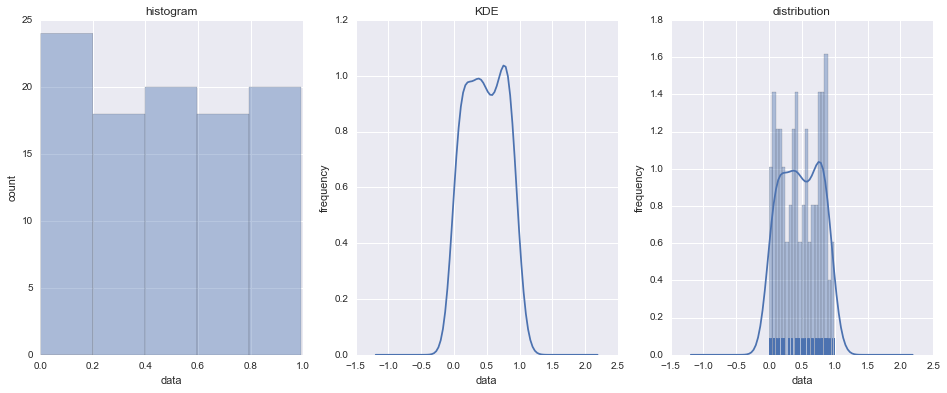

In [14]:
# Render three types of distribution plot with seaborn
# Create figure
fig = figure(figsize=(16, 6))

# Create subplot axes
ax1 = fig.add_subplot(1, 3, 1)  # 1x3 grid, position 1
ax2 = fig.add_subplot(1, 3, 2)  # 1x3 grid, position 1
ax3 = fig.add_subplot(1, 3, 3)  # 1x3 grid, position 1

# Set first axis y-label
ax1.set_ylabel('count')

# Set second, third axes y-labels
for axis in (ax2, ax3):
    axis.set_ylabel('frequency')

# Set all axes x-labels
for axis in (ax1, ax2, ax3):
    axis.set_xlabel('data')  

# Set axis titles
ax1.set_title('histogram')
ax2.set_title('KDE')
ax3.set_title('distribution')

# Plot histogram, KDE and all histogram/KDE/rug on three axes
sns.distplot(data, kde=False, ax=ax1)
sns.distplot(data, hist=False, ax=ax2)
sns.distplot(data, rug=True, ax=ax3, bins=20);